In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/Orders.csv')

In [7]:
data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [12]:
data_clean = data.copy()


In [46]:
data_clean["Sales"] = pd.to_numeric(data['Sales'].str.replace('$', '').str.replace(',', ''))
data_clean['Profit'] = pd.to_numeric(data['Profit'].str.replace('$', '').str.replace(',', ''))

In [50]:
data_clean.dtypes

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date                 object
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [56]:
data_clean.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,11


### Question 2

In [49]:
data_clean['Order.Date'] = pd.to_datetime(data_clean['Order.Date'])

In [54]:
data_clean['Year'] = pd.DatetimeIndex(data_clean['Order.Date']).year

In [55]:
data_clean['Month'] = pd.DatetimeIndex(data_clean['Order.Date']).month

In [74]:
data_grp = data_clean.groupby('Month').agg('sum')
data_grp = data_grp.reset_index()

In [75]:
data_grp.head()

,Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Year
0,1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900,5258055
1,2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000,4448403
2,3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404,6055482
3,4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600,6105764
4,5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500,7626250


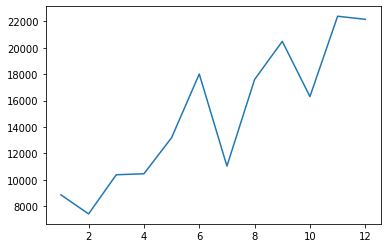

In [76]:
plt.plot(data_grp['Month'], data_grp['Quantity'])

In [ ]:
plt()